### This script creates a wolrd map woith the four domains for detecting tropical-extratropical cloud bands

#### Importation of appropriate packages

In [1]:
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
def get_cmap(n, name="viridis"):
    """Returns a function that maps each index in 0, 1, ..., n-1 to a distinct
    RGB color; the keyword argument name must be a standard mpl colormap name."""
    return mpl.cm.get_cmap(name, n) 

#### Method to transform the coordinates of the locations onto a choosen projection

In [3]:
def define_box(lat1, lat2, lon1, lon2, proj) -> tuple:
    geodetic = ccrs.Geodetic()
    lon1_t, lat1_t = proj.transform_point(lon1, lat1, geodetic)
    lon2_t, lat2_t = proj.transform_point(lon1, lat2, geodetic)
    lon3_t, lat3_t = proj.transform_point(lon2, lat2, geodetic)
    lon4_t, lat4_t = proj.transform_point(lon2, lat1, geodetic)
    return lat1_t, lat2_t, lat3_t, lat4_t, lon1_t, lon2_t, lon3_t, lon4_t

#### Set coordinates (and info) of corners for each domain

In [4]:
domains = dict(
        sop={"latlon": (5, -50, 130, -70), "name": "southpacific", "ls":"solid", "lw":2},
        nop={"latlon": (-5, 50, 115, -95), "name": "northpacific", "ls":"solid", "lw":2},
        sio={"latlon": (-10, -50, 0, 115), "name": "southindianocean", "ls":"solid", "lw":2},
        sat1={"latlon": (-10, -50, -80, 359.9999999999), "name": "southatlantic", "ls":"dashed", "lw":1}, # cross the edge of the map
        sat2={"latlon": (-10, -50, 0, 20), "name": "southatlantic", "ls":"dashed", "lw":1},
    )

#### Creation of the figure showing the domains

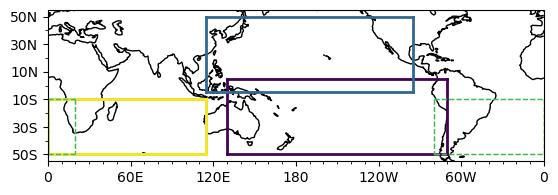

In [5]:
fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.PlateCarree(central_longitude=180)})
ax.set_yticks(np.arange(-90, 110, 20), crs=ccrs.PlateCarree())
ax.yaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_major_formatter(LatitudeFormatter(degree_symbol=""))
ax.set_xticks([0, 60, 120, 180, 240, 300, 359.9999999999], crs=ccrs.PlateCarree())
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=False, degree_symbol=""))
#
cmap = get_cmap(len(domains)-1)
#
ax.add_feature(cfeature.COASTLINE)
platecarree = ccrs.PlateCarree(central_longitude=180)

for i, (key, value) in enumerate(domains.items()):
        lat1, lat2, lon1, lon2 = value['latlon']
        lat1_t, lat2_t, lat3_t, lat4_t, lon1_t, lon2_t, lon3_t, lon4_t = define_box(
            lat1, lat2, lon1, lon2, proj=platecarree
        )
        ax.plot([lon1_t, lon2_t], [lat1_t, lat2_t], color=cmap(i), linewidth=value["lw"], ls=value["ls"], transform=platecarree)
        ax.plot([lon2_t, lon3_t], [lat2_t, lat3_t], color=cmap(i), linewidth=value["lw"], ls=value["ls"], transform=platecarree)
        ax.plot([lon4_t, lon3_t], [lat4_t, lat3_t], color=cmap(i), linewidth=value["lw"], ls=value["ls"], transform=platecarree)
        ax.plot([lon1_t, lon4_t], [lat1_t, lat4_t], color=cmap(i), linewidth=value["lw"], ls=value["ls"], transform=platecarree)
        if value["name"] == "southindianocean":
            ax.plot([lon1_t, lon2_t], [lat1_t, lat2_t], color=cmap(3), linewidth=value["lw"], ls=value["ls"], transform=platecarree)
            ax.plot([lon2_t, lon3_t], [lat2_t, lat3_t], color=cmap(3), linewidth=value["lw"], ls=value["ls"], transform=platecarree)
            ax.plot([lon4_t, lon3_t], [lat4_t, lat3_t], color=cmap(3), linewidth=value["lw"], ls=value["ls"], transform=platecarree)
            ax.plot([lon1_t, lon4_t], [lat1_t, lat4_t], color=cmap(3), linewidth=value["lw"], ls=value["ls"], transform=platecarree)
        elif value["name"] == "southatlantic":
            ax.plot([lon1_t, lon2_t], [lat1_t, lat2_t], color=cmap(2), linewidth=value["lw"], ls=value["ls"], transform=platecarree)
            ax.plot([lon2_t, lon3_t], [lat2_t, lat3_t], color=cmap(2), linewidth=value["lw"], ls=value["ls"], transform=platecarree)
            ax.plot([lon4_t, lon3_t], [lat4_t, lat3_t], color=cmap(2), linewidth=value["lw"], ls=value["ls"], transform=platecarree)    
            ax.plot([lon1_t, lon4_t], [lat1_t, lat4_t], color=cmap(2), linewidth=value["lw"], ls=value["ls"], transform=platecarree)